In [1]:
import sys
sys.path.insert(1,'../python_code')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import trapmodels
import kidcalc

from kidata import io,plot,calc,noise,filters

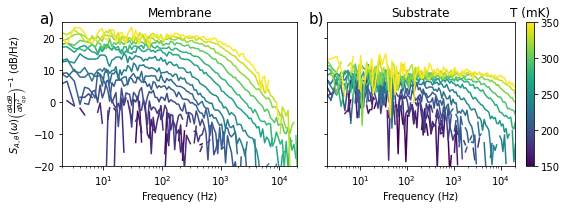

In [2]:
Tmax = 350 #mK
Tmin = 150 #mK
Pread = 99 #-1*dBm

fig,axs = plt.subplots(1,2,figsize=(8,3),sharey=True,sharex=True,squeeze=False)
for i,KIDnum in enumerate([2,3]):
    plot.spec('A1A2',[KIDnum],pltPread=[Pread],spec=['cross'],Tminmax=(Tmin,Tmax),
              lvlcomp='Resp',comptres=False,
              ax12=axs[0:1,i:i+1],clbar=False)
axs[0,0].set_title('Membrane')
axs[0,1].set_title('Substrate')
axs[0,0].set_ylabel(r'$S_{A,\theta}(\omega)\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[0,1].set_ylabel('')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylim(-20,25)
axs[0,0].set_xlim(2e0,2e4)
for ax,letter in zip([axs[0,0],axs[0,1]],['a)','b)']):
    ax.text(-.1,1,letter,transform=ax.transAxes,size=15)

clb = plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(Tmin,Tmax),
                                               matplotlib.cm.get_cmap('viridis')))
clb.ax.set_title('T (mK)')
fig.tight_layout()
fig.savefig('../figures/CrossSpec.pdf')

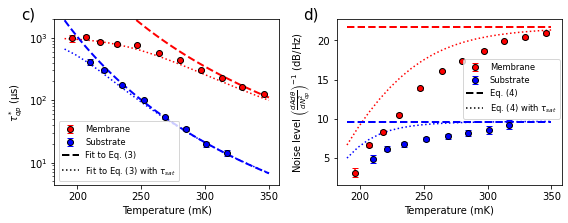

In [5]:
Tmax = 350 #mK
Tmin = 190 #mK
Pread = 99 #-1*dBm

fig,axs = plt.subplots(1,2,figsize=(8,3.2))
for i,(KIDnum,clr,label,relerr) in enumerate(zip(
    [2,3],['r','b'],['Membrane','Substrate'],[.135,.135])):  
    
    plot.ltnlvl('A1A2',[KIDnum],[Pread],Tminmax=(Tmin,Tmax),lvlcomp='Resp',
                ax12=axs,color=clr,label=label,fmt='o',tescPread=[Pread],
               pltkaplan=True,pltthlvl=True,relerrthrs=relerr,
                showfit=False,tescpltkaplan=False)
    
    
    V,kbTc,tesc = trapmodels.get_KIDparam('A1A2',KIDnum,Pread,
                                          tescPread=[Pread],tescrelerrthrs=relerr)
    model = trapmodels.Rt(V,kbTc,tesc)
    e = 0 #trap energy
    nrTraps = V*1.72e4*1.76*kbTc/2
    xi = 1
    t1 = 1e3*2
    
    T,tau,tauerr,NL,NLerr = model.calc_ltnlvl(Tmin*1e-3,Tmax*1e-3,
        e,nrTraps,t1,xi,plotspec=False,plotnumrates=False,PSDs='N')
    axs[0].plot(T*1e3,tau,linestyle='dotted',color=clr,alpha=1)
    axs[1].plot(T*1e3,10*np.log10(NL),linestyle='dotted',color=clr,alpha=1)

theoryline = matplotlib.lines.Line2D([0,1],[0,1],linestyle='--', color='k',linewidth=2.,
                                    label = 'Fit to Eq. (3)')
satline = matplotlib.lines.Line2D([0,1],[0,1],linestyle='dotted',color='k',alpha=1,
                                 label = 'Fit to Eq. (3) with $\\tau_{sat}$')
theoryline1 = matplotlib.lines.Line2D([0,1],[0,1],linestyle='--', color='k',linewidth=2.,
                                    label = 'Eq. (4)')
satline1 = matplotlib.lines.Line2D([0,1],[0,1],linestyle='dotted',color='k',alpha=1,
                                 label = 'Eq. (4) with $\\tau_{sat}$')


axs[0].set_ylim(None,2e3)
axs[0].legend(handles = axs[0].get_legend_handles_labels()[0] + [theoryline, satline],
             fontsize='small')
axs[1].legend(handles = axs[1].get_legend_handles_labels()[0] + [theoryline1, satline1],
             fontsize='small',
              loc='lower right',bbox_to_anchor=(1.01,.374))
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['c)','d)']):
    ax.text(-.15,1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('../figures/fits.pdf')

../python_code\kidata\calc.py:134: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')
../python_code\kidata\calc.py:134: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


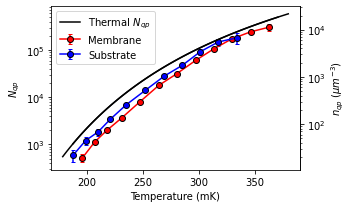

In [7]:
fig,ax = plt.subplots(figsize=(5,3))
for KIDnum,clr,label in zip([2,3],['r','b'],['Membrane','Substrate']):
    plot.Nqp('A1A2',KIDnum,[99],fig=fig,ax=ax,clr=clr,label=label,relerrthrs=.3,
            nqpaxis=(KIDnum==2))
handles,labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.savefig('../figures/Nqp.pdf')